In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
#Load data
data = pd.read_csv('Data/global-temperatures.csv')
years, temps = [], []

for row in pd.Series.to_numpy(data['Data']):
    separation_index = row.index(' ')
    years.append(int(row[:separation_index]))
    temps.append(float(row[separation_index+1:]))

years = np.round(np.array(years), decimals=0)
temps = np.round(np.array(temps), decimals=3)

,Data
0,1880 13.5725
1,1881 13.5991666666667
2,1882 13.685
3,1883 13.6716666666667
4,1884 13.395
...,...
133,2013 14.8091666666667
134,2014 14.8791666666667
135,2015 14.975
136,2016 15.2416666666667


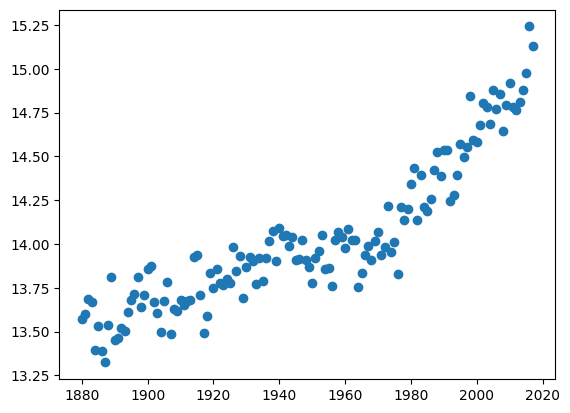

In [4]:
plt.figure()
plt.scatter(years, temps)


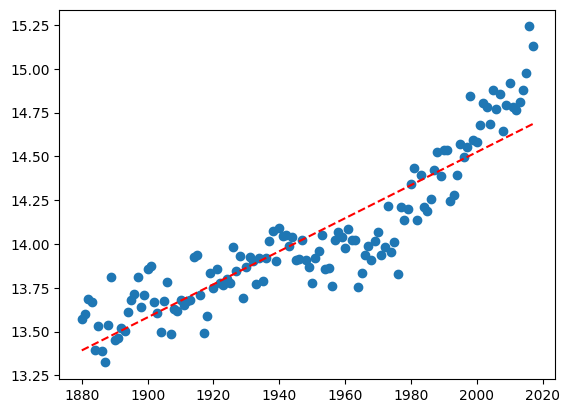

In [5]:
def linear_regression(x, y):
    x, y = np.array([x]), np.array([y])
    X = np.concatenate((x, np.ones((1, len(x[0])))))
    
    #Find features by (X^T X)^(-1) X^T y
    #Returns a 2x1 matrix (slope and intercept)
    theta = (np.linalg.inv(X@X.T)@X)@y.T

    slope = theta[0]
    intercept = theta[1]
    return slope, intercept
    

slope, intercept = linear_regression(years, temps)
    
plt.figure()
plt.scatter(years, temps)
plt.plot(years, years*slope + intercept, '--', c='r')


The $R^{2}$ metrics says how well a prediction model (in our case the linear regression model) fits the data overall. If we have a perfect fit, then $R^{2}$ is 1, while no correlation would be indicated with a value close to zero. 

In [6]:
from sklearn.metrics import r2_score
print(r2_score(temps, years*slope + intercept))

0.8145518462725185


If we have a model on the form $\beta_{0} + \beta_{1}x_{i} + \epsilon$, then the $\beta_{1}$ value would be our slope value 

Text(0.5, 1.0, 'Yearly residual')

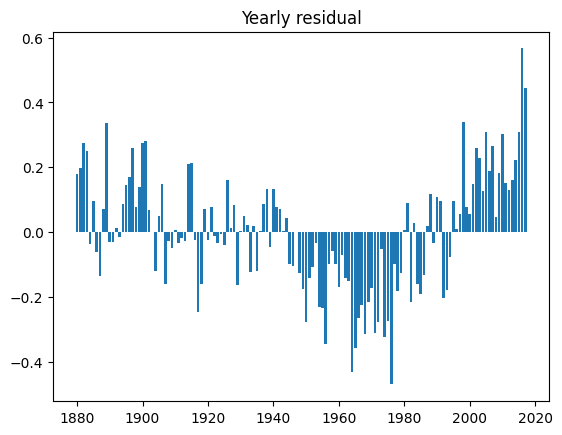

In [7]:
plt.figure()
plt.bar(years, temps - (years*slope + intercept))
plt.title('Yearly residual')